### Import 

In [35]:
from MFEA_lib.model import SMP_MFEA, MFEA_base, SA_MFEA, AbstractModel
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Competitions import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark
from MFEA_lib.tasks.Benchmark.Competitions.utils import * 
from MFEA_lib.tasks.Benchmark.Competitions.Default_Ind import Individual_func
from MFEA_lib.EA import * 

import os 
import sys 
import numpy as np 
import pandas as pd
import scipy 
import inspect 


In [2]:
primary_type= [int,np.int32,np.uint8, float, np.float32, np.float64, np.ndarray,tuple, bool, str, list] 

## Utils

In [3]:

def classname_to_class(classname):
    return getattr(sys.modules[__name__], classname)

def module_class_str_to_class(module, classname):
    return getattr(sys.modules[__name__].__dict__[module], classname)

## Convert

### Convert .mso file 

In [28]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/SBX/S-MFEA_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0], set_attribute= True) 
# model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/COMPARE_KL_GECCO_S-MFEA/S-MFEA_KL/1.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0], set_attribute= True) 

In [29]:
def process_save_list(ls): 
    '''
    Convert list elements
    '''
    global primary_type 
    saved_ls = []
    for element in ls:
        if type(element) not in primary_type: 
            if type(element) is dict or hasattr(element, '__dict__'): 
               saved_ls.append(process_save_object(element, dict())) 

        else:
            if type(element) is list:
                saved_ls.append(process_save_list(element))
            else: saved_ls.append(element) 
    return saved_ls

def process_save_dict(diction: dict, saved_dict = dict()): 
    '''
    Return a dict 
    '''
    saved_dict['name_type_object'] = 'dict' 
    # primary_type= [int, np.uint8, float, np.float32, np.float64, np.ndarray,tuple, bool, str, type(None), list] 
    global primary_type 

    for key, value in diction.items(): 
        if hasattr(value, "__dict__"):
            saved_dict[key] = process_save_object(value, dict()) 
        else:
            if type(value) is list: 
                saved_dict[key] = process_save_list(value)
            elif type(value) is dict: 
                saved_dict[key] = process_save_dict(value, dict())
            elif type(value) in primary_type: 
                saved_dict[key] = value 
            else: 
                if "method" in str(type(value)) or \
                   "function" in str(type(value)) or \
                   "attribute" in str(type(value)): 
                    continue
                if value is None: 
                    saved_dict[key] = None
                print(f"{key} : {value}, {type(value)} cannot saved in process_save_dict function")
                # exit(0) 
                try:
                    saved_dict[key] = str(value)
                except:
                    print(f"Cannot save {key} : {value}; type: {type(value)}")
    return saved_dict 

def process_save_object(model, saved_object = dict()):
    '''
    Return a new dict object  
    '''
    if type(model).__name__ != 'type':
        if type(model).__name__ == 'model':
            saved_object['name_type_object'] = type(model).__module__ + "." + type(model).__name__
            # module_class_str_to_class(type(model).__module__.split(".")[-1],type(model).__name__)
        else:    
            saved_object['name_type_object'] = type(model).__name__
            # classname_to_class(type(model).__name__)
    else:
        if model.__name__ == 'model': 
            saved_object['name_type_object'] = model.__module__ + "." + model.__name__ 
            # module_class_str_to_class((model).__module__.split(".")[-1],(model).__name__)
        else: 
            saved_object['name_type_object'] = model.__name__ 
            # classname_to_class((model).__name__)
    # saved_object['name_type_object'] = type(model).__name__ if type(model).__name__ != "type" else model.__name__
    
    for key, value in model.__dict__.items(): 
        if hasattr(value, "__dict__"):
            saved_object[key] = process_save_object(value, dict())
        else: 
            if type(value) is list: 
                saved_object[key] = process_save_list(value)
            elif type(value) is dict: 
                saved_object[key] = process_save_dict(value, dict())
            elif type(value) in primary_type: 
                saved_object[key] = value 
            else: 
                if  "method" in str(type(value)) or \
                    "function" in str(type(value)) or \
                    "attribute" in str((value)) or \
                    "object" in str((value)): 
                    continue 
                if value is None: 
                    saved_object[key] = None
                 
                # print(f"=={key} : {value}, {type(value)} == cannot saved in function process_save_object")
                try:
                    saved_object[key] = str(value)
                except:
                    print(f"Cannot save {key} : {value}; type: {type(value)} because it cannot convert to string.")
    return saved_object

In [30]:
new_model = process_save_object(model, dict())
import pickle 
with open("new_model.mso", 'wb') as file: 
    pickle.dump(new_model, file)

** Problem: 
- \_\_name\_\_ modell in model.ls_model[0] cannot create because it is "model" :)
- IndClass same

In [35]:
print(new_model.keys())

dict_keys(['name_type_object', 'model', 'name', 'list_attri_avg', 'ls_model', 'ls_seed', 'total_time', 'status', 'compile_kwargs', 'crossover', 'mutation', 'selection', 'search', 'attr_tasks', 'tasks', 'IndClass', 'args', 'kwargs', 'nb_generations', 'nb_inds_each_task', 'nb_inds_min', 'lr', 'p_const_intra', 'prob_search', 'lc_nums', 'nb_epochs_stop', 'swap_po', 'evaluate_initial_skillFactor', 'nb_run', 'history_cost', 'history_smp'])


## Load


### Load new .mso file

In [31]:
import pickle 
import numpy as np 

with open("./new_model.mso", 'rb') as file: 
    model_dict = pickle.load(file)

# print(type(a))

In [39]:
a= 'SMP_MFEA'
a.lower()

'smp_mfea'

In [40]:
import inspect 

ls_error = [] 

def restore_list_attr(ls):
    global primary_type 
    # primary_type= [int, np.uint8, float, np.float32, np.float64, np.ndarray,tuple, bool, str, type(None), list]
    new_ls = [] 
    for element in ls:
        if type(element) in primary_type: 
            if type(element) is list:
                new_ls.append(restore_list_attr(element))
            else: new_ls.append(element) 
        else: 
            if type(element) is dict: 
                if element['name_type_object'].lower() == 'dict': 
                    new_ls.append(restore_dict_attr(element))
                else:
                    new_ls.append(restore_object(element))
    return new_ls

def restore_dict_attr(diction: dict): 
    new_dict = {}
    global primary_type
    # primary_type= [int, np.uint8, float, np.float32, np.float64, np.ndarray,tuple, bool, str, type(None), list]
    for key, value in diction.items():
        if type(value) is list:
            new_dict[key]= restore_list_attr(value) 
            pass 
        elif type(value) is dict: 
            if value['name_type_object'].lower() == 'dict': 
                new_dict[key] = restore_dict_attr(value)
            else: 
                new_dict[key] = restore_object(value) 
        elif type(value) in primary_type: 
            new_dict[key] = value 
        else: 
            error = f"{key}: {value} cannot assigned"
            if error not in ls_error:
                print(error)
                ls_error.append(error)
    


def assign_attribute(model, attri_diction: dict):
    global primary_type
    for key, value in attri_diction.items():
        if type(value) is list: 
            # model.key = process_list_attr(value)
            setattr(model, key, restore_list_attr(value))
        elif type(value) is dict: 
            if value['name_type_object'].lower() == 'dict': 
                setattr(model, key, restore_dict_attr(value))
            else:
                setattr(model, key, restore_object(value))
        elif type(value) in primary_type: 
            setattr(model, key, (value))
            # model.key = value 
        else: 
            error = f"{key}: {value} ||| {type(value)} cannot assigned"
            if error not in ls_error:
                print(error)
                ls_error.append(error)
        
    return model 


def restore_object(diction):
    if type(diction) is not dict: 
        return None 
    if diction['name_type_object'].lower() == 'dict':
        return restore_dict_attr(diction)
    # print(diction)
    if diction['name_type_object'] == 'function':
        return None 
    try:
        if len(diction['name_type_object'].split(".")) == 1: 
            if '__module__' not in diction.keys():
                model = classname_to_class(diction['name_type_object'])
            else: 
                try: 
                    model = classname_to_class(diction['name_type_object'])
                except:
                    try:
                        model = module_class_str_to_class(diction['__module__'].split(".")[-1], diction['name_type_object'])
                    except:
                        error = (f"Cannot restore {diction['name_type_object']}")
                        if error not in ls_error:
                            print(error)
                            ls_error.append(error)
                        return None 
        else: 
            module, classname = diction['name_type_object'].split(".")[-2:]

            model = module_class_str_to_class(module, classname) 
    except:
        class Temp: 
            def __init__(self) -> None:
                pass
        model = Temp 
        error = f"Error when create object {diction['name_type_object']}. Using Temp class instead"
        if error not in ls_error:
            print(error)
            ls_error.append(error)

        
    if '__module__' in diction.keys():
        return model 

    # return model 
    init_parameters = {} 
    signature = inspect.signature(model.__init__).parameters 
    for name, parameter in signature.items(): 
        if name == 'self': continue 
        if name in diction.keys(): 
            # print(name)
            if type(diction[name]) is dict: 
                if diction[name]['name_type_object'].lower() == 'dict':
                    init_parameters[name] = restore_dict_attr(diction[name])
                else: 
                    init_parameters[name] = restore_object(diction[name])
            elif type(diction[name]) is list: 
                init_parameters[name] = restore_list_attr(diction[name])
            elif type(diction[name]) in primary_type:
                init_parameters[name] = diction[name] 
            else: 
                error = (f'Cannot convert {diction[name]} to create init parameters')
                if error not in ls_error:
                    print(error)
                    ls_error.append(error)
                
                init_parameters[name]= None 
            # print(init_parameters[name])
            # print()
        else: 
            # print(parameter.default)
            init_parameters[name] = parameter.default
    try:
        instance_model = model(**init_parameters)
    except Exception as e :
        if e not in ls_error:
            print(e) 
            ls_error.append(e)
        print()
        error = (f"Error while create instance model for {model}. Using Temp class instead")
        if error not in ls_error:
            print(error)
            ls_error.append(error)
        class Temp: 
            def __init__(self) -> None:
                pass 
        instance_model = Temp() 

    new_model = assign_attribute(instance_model, diction)
    return new_model 


In [ ]:
restore_model = restore_object(model_dict)

3
10


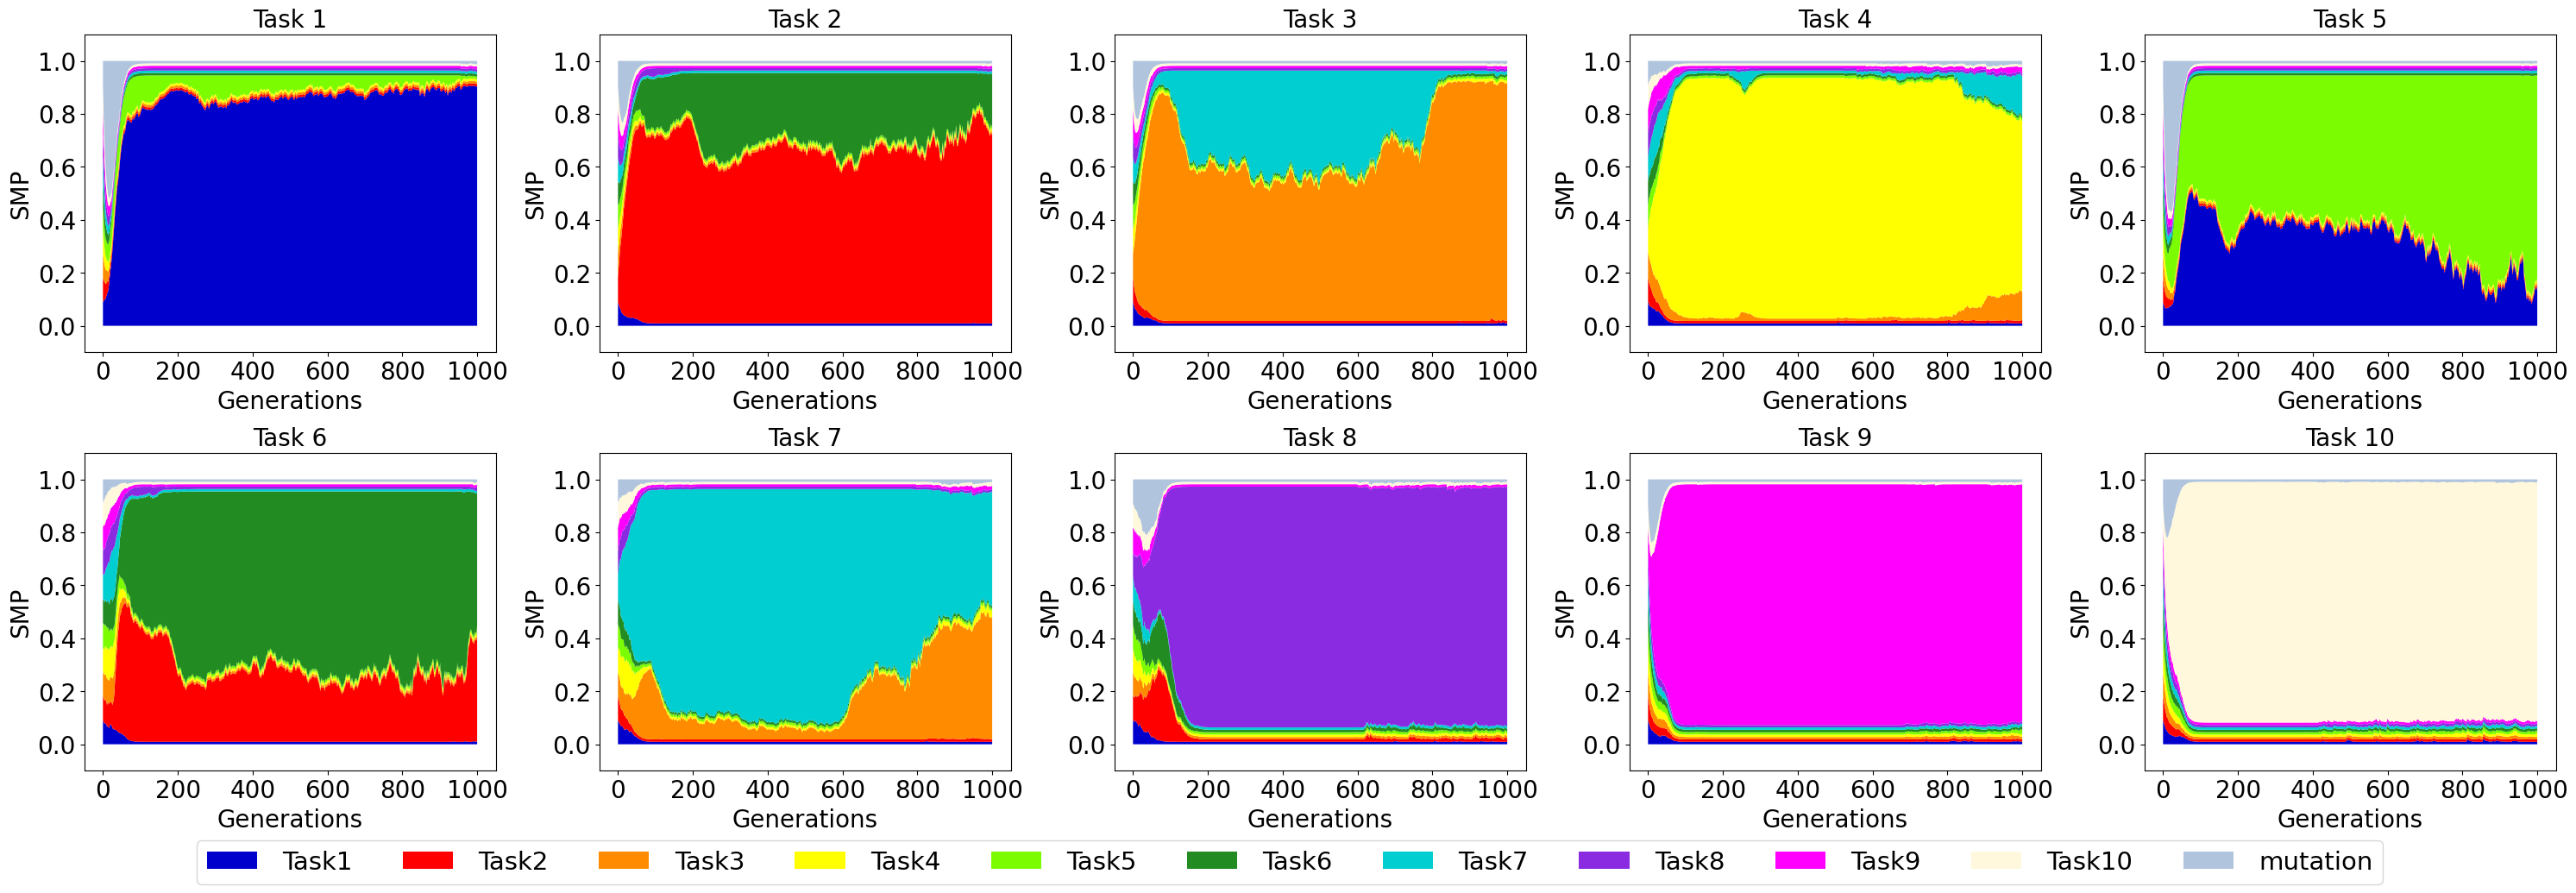

In [43]:
restore_model.render_smp(shape=(2,5), title= "", grid= False, label_loc= "lower center",
    title_size= 20,
    label_size_x= 20,
    label_size_y= 20,
    x_tick_size= 20,
    y_tick_size= 20,
    handletextpad= 1,
    # borderaxespad=0.8,
    bbox_to_anchor=(0.5,-0.06),
    legend_size= 21,
    ncol = 11, 
)

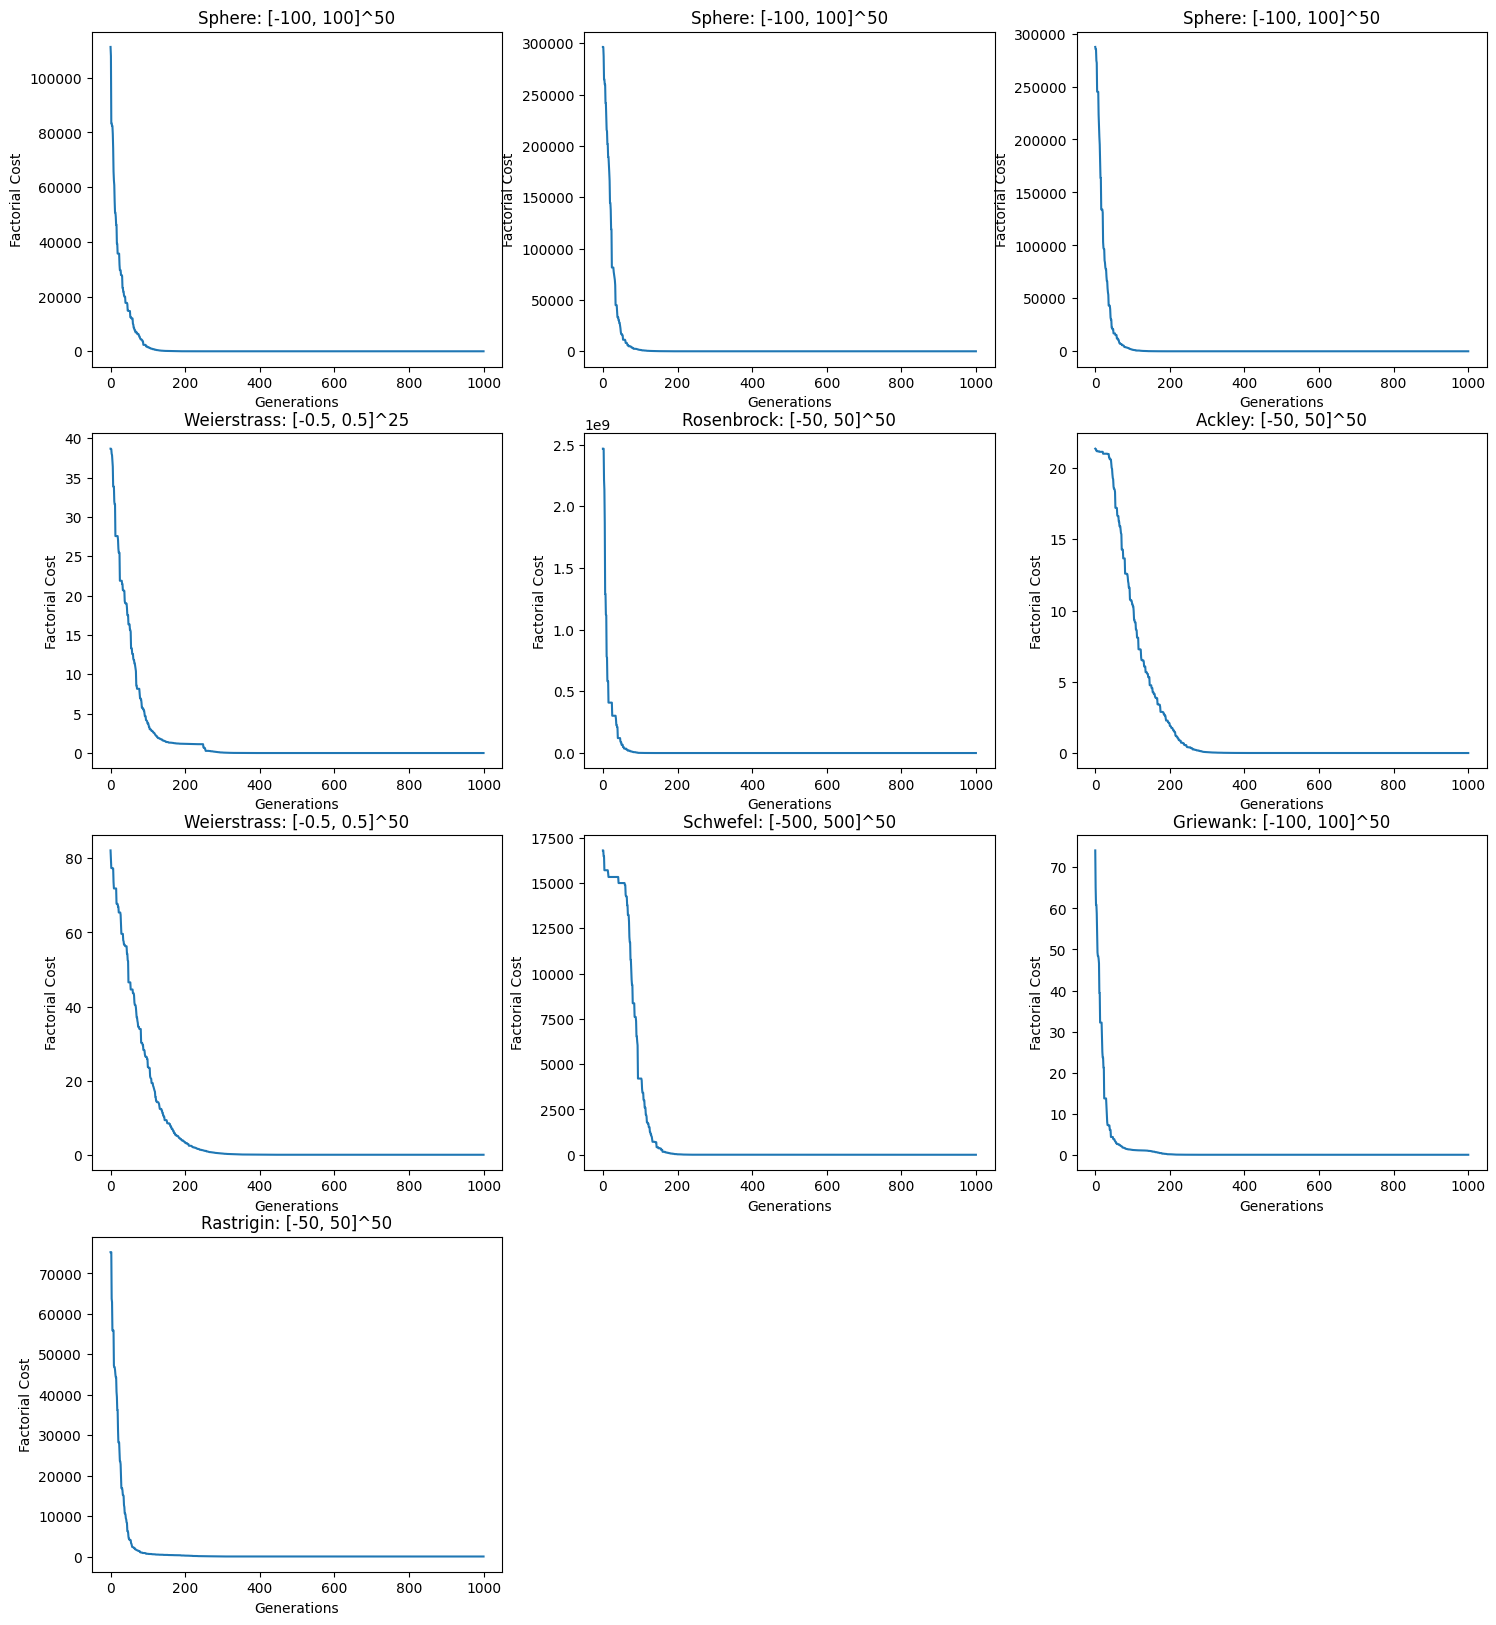

In [42]:
restore_model.ls_model[0].render_history()

In [ ]:
string = str(a)

In [ ]:
clsmembers = inspect.getmembers(sys.modules[__name__].__dict__["SMP_MFEA"], inspect.isclass)

In [ ]:
sys.modules[__name__].__dict__["SMP_MFEA"]

<module 'MFEA_lib.model.SMP_MFEA' from 'd:\\LinhTinh\\Code_Lab\\MFEA-v3.0\\MFEA_lib\\model\\SMP_MFEA.py'>

In [ ]:
string.split("'")[-2].split('.')[-3:]

['SMP_MFEA', 'model', 'battle_smp']

In [ ]:
import importlib
module = importlib.import_module("MultiTimeModel")
# __import__('SMP_MFEA')


ModuleNotFoundError: No module named 'MultiTimeModel'

In [ ]:
module_class_str_to_class()

In [ ]:
(restore_model.ls_model[])

In [ ]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [ ]:
model_dict['name_type_object']

'MultiTimeModel'

In [ ]:
restored_model = str_to_class(model_dict['name_type_object'])

In [ ]:
print(restored_model)

<class 'MFEA_lib.model.utils.MultiTimeModel.MultiTimeModel'>


In [ ]:
class Temp: 
    def __init__(self) -> None:
        pass

a = MFEA_base.model

# a = Temp() 
type_a = type(a) 
print(a.__module__)
print(type_a.__module__)

MFEA_lib.model.MFEA_base
builtins


In [ ]:
import inspect 

signature = inspect.signature(restored_model.__init__).parameters 
for name, parameter in signature.items(): 
    print("name: ", name, " default: ", parameter.default)

name:  self  default:  <class 'inspect._empty'>
name:  model  default:  None
name:  list_attri_avg  default:  None
name:  name  default:  None


In [ ]:
model_dict['model']

{'name_type_object': MFEA_lib.model.SMP_MFEA.model,
 '__module__': 'MFEA_lib.model.SMP_MFEA',
 'battle_smp': {'name_type_object': 'battle_smp',
  '__module__': 'MFEA_lib.model.SMP_MFEA',
  '__init__': {'name_type_object': 'function'},
  'get_smp': {'name_type_object': 'function'},
  'update_SMP': {'name_type_object': 'function'}},
 '__init__': {'name_type_object': 'function'},
 'compile': {'name_type_object': 'function'},
 'render_smp': {'name_type_object': 'function'},
 'fit': {'name_type_object': 'function'}}

In [ ]:
import sys 

def str_to_class(module, classname): 
    return getattr(sys.modules[__name__].__dict__[module], classname)

In [ ]:
new_model = restore_object(model_dict)

In [26]:
model_dict['ls_model']

KeyboardInterrupt: 

In [15]:
new_model.history_cost

array([[1.10499036e+05, 1.11413430e+05, 1.09430201e+05, ...,
        1.13350167e+05, 1.11415546e+05, 1.09090756e+05],
       [1.09185515e+05, 1.09990245e+05, 1.08862274e+05, ...,
        1.12224713e+05, 1.10755671e+05, 1.08573066e+05],
       [1.07711844e+05, 1.09511944e+05, 1.08461749e+05, ...,
        1.11540641e+05, 1.08953806e+05, 1.07847828e+05],
       ...,
       [8.60070893e-01, 9.63130296e-01, 9.81602255e-01, ...,
        1.18659847e+00, 1.24658694e+00, 1.27807594e+00],
       [8.55662224e-01, 9.49325355e-01, 9.74076512e-01, ...,
        1.18058710e+00, 1.24373271e+00, 1.27271950e+00],
       [8.52230306e-01, 9.41964505e-01, 9.67978856e-01, ...,
        1.17683135e+00, 1.23542599e+00, 1.25938853e+00]])

In [11]:
crossover = getattr(new_model.ls_model[0], 'crossover')

In [14]:
print(crossover.name_type_object)

KL_SBXCrossover


In [ ]:
class Test: 
    def __init__(self) -> None:
        self.a = 1 
    def __init__(self, a)-> None:
        self.a = a  
    
a = Test
# a.b = 12
# print(a.b)
print(type(a))
print(a.__name__)

<class 'type'>
Test


In [ ]:
type(None)

NoneType

## Test

In [22]:
model_dict.keys()

dict_keys(['name_type_object', 'model', 'name', 'list_attri_avg', 'ls_model', 'ls_seed', 'total_time', 'status', 'compile_kwargs', 'crossover', 'mutation', 'selection', 'search', 'attr_tasks', 'tasks', 'IndClass', 'args', 'kwargs', 'nb_generations', 'nb_inds_each_task', 'nb_inds_min', 'lr', 'p_const_intra', 'prob_search', 'lc_nums', 'nb_epochs_stop', 'swap_po', 'evaluate_initial_skillFactor', 'nb_run', 'history_cost'])